# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


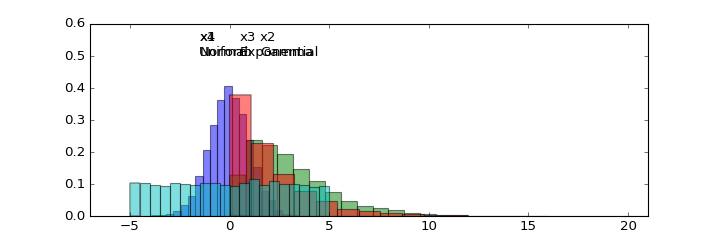

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(loc = 0.0, scale = 1, size = 10000)
x2 = np.random.gamma(2, 1.5, size = 10000)
x3 = np.random.exponential(2, size = 10000)
x4 = np.random.uniform(low = -5, high = 5, size = 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


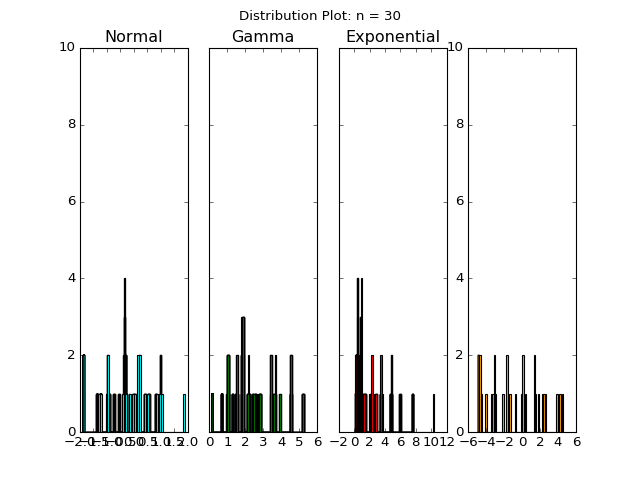

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

n = 30
bins = 60

fig = plt.figure()
gspec = gridspec.GridSpec(1, 4)

normdist = plt.subplot(gspec[0,0], title = 'Normal')
gammdist = plt.subplot(gspec[0,1], sharey = normdist, title = 'Gamma')
expodist = plt.subplot(gspec[0,2], sharey = normdist, title = 'Exponential')
unifdist = plt.subplot(gspec[0,3], sharey = normdist, title = 'Uniform')

# create the function that will do the plotting, where curr is the current frame
def animate(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    
    if curr == n:
        a.event_source.stop()
    
    plt.cla()
    normdist.hist(x1[:curr], bins = bins, color = 'cyan')
    normdist.set_ylim(0,10)
    gammdist.hist(x2[:curr], bins = bins, color = 'green')
    expodist.hist(x3[:curr], bins = bins, color = 'red')
    unifdist.hist(x4[:curr], bins = bins, color = 'orange')
    
    plt.suptitle('Distribution Plot: n = {}'.format(curr))

a = animation.FuncAnimation(fig, animate, interval=10)

for plot in [gammdist, expodist, unifdist]:
    plt.setp(plot.get_yticklabels(), visible=False)